### The Take Home Test

Importing Required Libraries

In [1]:
## Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_colwidth', -1)

Loading the Dataset

In [2]:
#Load the dataset Payload trucks 1_10
df = pd.read_csv("../machine/Payload trucks 1_10 updated.csv",low_memory=False)
df.head()

,MACH_SER_NO,OCUR_TS_Date,OCUR_TS_Time,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_LOCAL
0,Truck 1,22-Jul-16,05.44.52.000000000 AM,349.7,193.0,454.0,711.0,3.6,648.0,610.0,2.8,5.0,77.600942,79.0,22-JUL-16 12.44.52.000000000 AM
1,Truck 1,22-Jul-16,06.30.20.000000000 AM,336.5,323.0,99.0,177.0,0.6,56.0,1225.0,6.8,6.0,177.914355,73.0,22-JUL-16 01.30.20.000000000 AM
2,Truck 1,22-Jul-16,07.02.59.000000000 AM,356.3,321.0,864.0,867.0,5.7,61.0,857.0,4.6,4.0,138.167531,100.0,22-JUL-16 02.02.59.000000000 AM
3,Truck 1,22-Jul-16,07.54.33.000000000 AM,343.1,361.0,594.0,667.0,4.6,63.0,871.0,4.6,4.0,140.060237,99.0,22-JUL-16 02.54.33.000000000 AM
4,Truck 1,22-Jul-16,08.38.55.000000000 AM,379.3,218.0,689.0,894.0,6.4,3725.0,1130.0,4.4,5.0,219.080709,103.0,22-JUL-16 03.38.55.000000000 AM


In [3]:
df.info

<bound method DataFrame.info of       MACH_SER_NO OCUR_TS_Date           OCUR_TS_Time  PAYLD_WT  LD_TM  \
0      Truck 1     22-Jul-16    05.44.52.000000000 AM  349.7     193.0   
1      Truck 1     22-Jul-16    06.30.20.000000000 AM  336.5     323.0   
2      Truck 1     22-Jul-16    07.02.59.000000000 AM  356.3     321.0   
3      Truck 1     22-Jul-16    07.54.33.000000000 AM  343.1     361.0   
4      Truck 1     22-Jul-16    08.38.55.000000000 AM  379.3     218.0   
...        ...           ...                      ...    ...       ...   
70648  NaN         NaN          NaN                   NaN       NaN      
70649  NaN         NaN          NaN                   NaN       NaN      
70650  NaN         NaN          NaN                   NaN       NaN      
70651  NaN         NaN          NaN                   NaN       NaN      
70652  NaN         NaN          NaN                   NaN       NaN      

       EMTY_STOP_TM  EMTY_TRAV_TM  EMTY_TRAV_DSTNC  LD_STOP_TM  LD_TRAV_TM  \
0

In [4]:
df.describe()

,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT
count,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000
mean,333.875477,181.831290,454.724796,652.557902,3.844460,494.990463,860.663261,4.116894,4.123751,140.974035,93.418256
std,58.505307,109.133516,683.359213,275.309613,1.855567,751.357734,290.729274,1.604505,0.923801,45.905858,30.371788
min,0.000000,4.000000,0.000000,0.000000,0.000000,42.000000,30.000000,0.000000,1.000000,4.258588,2.000000
25%,320.800000,129.000000,54.000000,469.750000,2.400000,73.000000,675.000000,2.800000,4.000000,112.616002,72.000000
50%,344.300000,155.000000,196.000000,635.000000,3.800000,174.500000,845.000000,4.000000,4.000000,137.694355,90.000000
75%,364.425000,202.000000,520.250000,808.000000,5.100000,618.000000,1005.000000,5.200000,5.000000,169.397179,110.000000
max,548.700000,2378.000000,6556.000000,2382.000000,16.000000,9186.000000,3339.000000,16.600000,9.000000,412.136712,244.000000


In [5]:
#Load the dataset Payload trucks 11_20
df1 = pd.read_csv("../machine/Payload trucks 11_20 updated.csv",low_memory=False)
df1.head()

,MACH_SER_NO,OCUR_TS,Unnamed: 2,SMU,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_L,OCAL
0,Truck 11,22-Jul-16,12.07.18.000000000 AM,23018.03444,399.5,92.0,129.0,231.0,1.6,67.0,513.0,2.8,4.0,86.118119,69.0,22-Jul-16,11.07.18.000000000 AM
1,Truck 11,22-Jul-16,12.25.11.000000000 AM,23018.33250,333.8,133.0,92.0,362.0,2.8,75.0,472.0,2.8,4.0,86.118119,69.0,22-Jul-16,11.25.11.000000000 AM
2,Truck 11,22-Jul-16,12.44.52.000000000 AM,23018.66056,361.2,120.0,30.0,318.0,2.7,76.0,475.0,2.7,4.0,85.171766,66.0,22-Jul-16,11.44.52.000000000 AM
3,Truck 11,22-Jul-16,01.02.31.000000000 AM,23018.95500,365.2,109.0,63.0,305.0,2.7,73.0,497.0,2.8,4.0,86.591295,74.0,22-Jul-16,12.02.31.000000000 PM
4,Truck 11,22-Jul-16,01.20.42.000000000 AM,23019.25806,327.8,93.0,43.0,327.0,2.4,77.0,496.0,2.8,4.0,83.752236,83.0,22-Jul-16,12.20.42.000000000 PM


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70653 entries, 0 to 70652
Data columns (total 15 columns):
MACH_SER_NO         4404 non-null object
OCUR_TS_Date        4404 non-null object
OCUR_TS_Time        4404 non-null object
PAYLD_WT            4404 non-null float64
LD_TM               4404 non-null float64
EMTY_STOP_TM        4404 non-null float64
EMTY_TRAV_TM        4404 non-null float64
EMTY_TRAV_DSTNC     4404 non-null float64
LD_STOP_TM          4404 non-null float64
LD_TRAV_TM          4404 non-null float64
LD_TRAV_DSTNC       4404 non-null float64
LD_PASS_CT          4404 non-null float64
FUEL_USED_IN_CYC    4404 non-null float64
SHFT_CT             4404 non-null float64
OCUR_TS_LOCAL       4404 non-null object
dtypes: float64(11), object(4)
memory usage: 8.1+ MB


In [7]:
#Rename multiple column
df1.rename(columns={'OCUR_TS':'OCUR_TS_Date','Unnamed: 2':'OCUR_TS_Time'}, inplace=True)
df1.head()

,MACH_SER_NO,OCUR_TS_Date,OCUR_TS_Time,SMU,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_L,OCAL
0,Truck 11,22-Jul-16,12.07.18.000000000 AM,23018.03444,399.5,92.0,129.0,231.0,1.6,67.0,513.0,2.8,4.0,86.118119,69.0,22-Jul-16,11.07.18.000000000 AM
1,Truck 11,22-Jul-16,12.25.11.000000000 AM,23018.33250,333.8,133.0,92.0,362.0,2.8,75.0,472.0,2.8,4.0,86.118119,69.0,22-Jul-16,11.25.11.000000000 AM
2,Truck 11,22-Jul-16,12.44.52.000000000 AM,23018.66056,361.2,120.0,30.0,318.0,2.7,76.0,475.0,2.7,4.0,85.171766,66.0,22-Jul-16,11.44.52.000000000 AM
3,Truck 11,22-Jul-16,01.02.31.000000000 AM,23018.95500,365.2,109.0,63.0,305.0,2.7,73.0,497.0,2.8,4.0,86.591295,74.0,22-Jul-16,12.02.31.000000000 PM
4,Truck 11,22-Jul-16,01.20.42.000000000 AM,23019.25806,327.8,93.0,43.0,327.0,2.4,77.0,496.0,2.8,4.0,83.752236,83.0,22-Jul-16,12.20.42.000000000 PM


In [8]:
#Concatenating df and df1
dataset = pd.concat([df,df1], axis=0, ignore_index=True,sort=False)
dataset.head()

,MACH_SER_NO,OCUR_TS_Date,OCUR_TS_Time,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,OCUR_TS_LOCAL,SMU,OCUR_TS_L,OCAL
0,Truck 1,22-Jul-16,05.44.52.000000000 AM,349.7,193.0,454.0,711.0,3.6,648.0,610.0,2.8,5.0,77.600942,79.0,22-JUL-16 12.44.52.000000000 AM,NaN,NaN,NaN
1,Truck 1,22-Jul-16,06.30.20.000000000 AM,336.5,323.0,99.0,177.0,0.6,56.0,1225.0,6.8,6.0,177.914355,73.0,22-JUL-16 01.30.20.000000000 AM,NaN,NaN,NaN
2,Truck 1,22-Jul-16,07.02.59.000000000 AM,356.3,321.0,864.0,867.0,5.7,61.0,857.0,4.6,4.0,138.167531,100.0,22-JUL-16 02.02.59.000000000 AM,NaN,NaN,NaN
3,Truck 1,22-Jul-16,07.54.33.000000000 AM,343.1,361.0,594.0,667.0,4.6,63.0,871.0,4.6,4.0,140.060237,99.0,22-JUL-16 02.54.33.000000000 AM,NaN,NaN,NaN
4,Truck 1,22-Jul-16,08.38.55.000000000 AM,379.3,218.0,689.0,894.0,6.4,3725.0,1130.0,4.4,5.0,219.080709,103.0,22-JUL-16 03.38.55.000000000 AM,NaN,NaN,NaN


### Exploratory Data Analysis

In [9]:
#Get the number of rows and columns
dataset.shape

(177642, 18)

The dataset contains 177642 observations and 18 columns

In [10]:
# list of columns 
list(dataset)

['MACH_SER_NO',
 'OCUR_TS_Date',
 'OCUR_TS_Time',
 'PAYLD_WT',
 'LD_TM',
 'EMTY_STOP_TM',
 'EMTY_TRAV_TM',
 'EMTY_TRAV_DSTNC',
 'LD_STOP_TM',
 'LD_TRAV_TM',
 'LD_TRAV_DSTNC',
 'LD_PASS_CT',
 'FUEL_USED_IN_CYC',
 'SHFT_CT',
 'OCUR_TS_LOCAL',
 'SMU',
 'OCUR_TS_L',
 'OCAL']

In [11]:
#Display number of rows, columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177642 entries, 0 to 177641
Data columns (total 18 columns):
MACH_SER_NO         14830 non-null object
OCUR_TS_Date        14830 non-null object
OCUR_TS_Time        14830 non-null object
PAYLD_WT            14830 non-null float64
LD_TM               14830 non-null float64
EMTY_STOP_TM        14830 non-null float64
EMTY_TRAV_TM        14830 non-null float64
EMTY_TRAV_DSTNC     14830 non-null float64
LD_STOP_TM          14830 non-null float64
LD_TRAV_TM          14830 non-null float64
LD_TRAV_DSTNC       14830 non-null float64
LD_PASS_CT          14830 non-null float64
FUEL_USED_IN_CYC    14830 non-null float64
SHFT_CT             14830 non-null float64
OCUR_TS_LOCAL       4404 non-null object
SMU                 10426 non-null float64
OCUR_TS_L           10426 non-null object
OCAL                10426 non-null object
dtypes: float64(12), object(6)
memory usage: 24.4+ MB


In [12]:
#Summary statistics for numerical columns
dataset.describe()

,PAYLD_WT,LD_TM,EMTY_STOP_TM,EMTY_TRAV_TM,EMTY_TRAV_DSTNC,LD_STOP_TM,LD_TRAV_TM,LD_TRAV_DSTNC,LD_PASS_CT,FUEL_USED_IN_CYC,SHFT_CT,SMU
count,14830.000000,14830.000000,14830.000000,14830.000000,14830.000000,14830.000000,14830.000000,14830.000000,14830.000000,14830.000000,14830.000000,10426.000000
mean,341.915017,142.072825,308.009440,520.719016,3.963270,208.964734,713.682333,4.278071,4.249831,119.063358,92.630479,17709.727352
std,44.932323,73.119634,536.052774,218.864337,1.665923,498.713579,243.520933,1.500932,1.010811,39.142916,25.991347,4573.240561
min,0.000000,4.000000,0.000000,0.000000,0.000000,36.000000,17.000000,0.000000,1.000000,4.258588,2.000000,11510.447780
25%,329.100000,107.000000,53.000000,377.000000,2.800000,57.000000,571.000000,3.200000,4.000000,95.581648,75.000000,12631.366037
50%,347.100000,123.000000,146.000000,524.000000,4.100000,66.000000,711.000000,4.300000,4.000000,118.294119,92.000000,18618.089585
75%,365.200000,155.000000,318.000000,610.000000,5.200000,95.000000,846.000000,5.600000,5.000000,142.426120,109.000000,22855.543960
max,548.700000,2378.000000,12149.000000,2382.000000,16.000000,9915.000000,3339.000000,16.600000,10.000000,412.136712,244.000000,23575.371670


### Data Analysis

Let's explore the dataset a bit to see if we can find any trends

#### 1.Total tons by each truck and combined

In [13]:
stats = dataset['MACH_SER_NO'].describe()
stats

count     14830   
unique    20      
top       Truck 11
freq      1209    
Name: MACH_SER_NO, dtype: object

In [14]:
grouped = dataset.groupby('MACH_SER_NO').size().sort_values(ascending=False)
grouped

MACH_SER_NO
Truck 11    1209
Truck 19    1166
Truck 16    1148
Truck 20    1129
Truck 18    1126
Truck 14    1091
Truck 17    1087
Truck 12    1011
Truck 15    742 
Truck 13    717 
Truck 8     705 
Truck 9     688 
Truck 1     680 
Truck 5     499 
Truck 4     491 
Truck 6     429 
Truck 3     277 
Truck 7     253 
Truck 2     219 
Truck 10    163 
dtype: int64

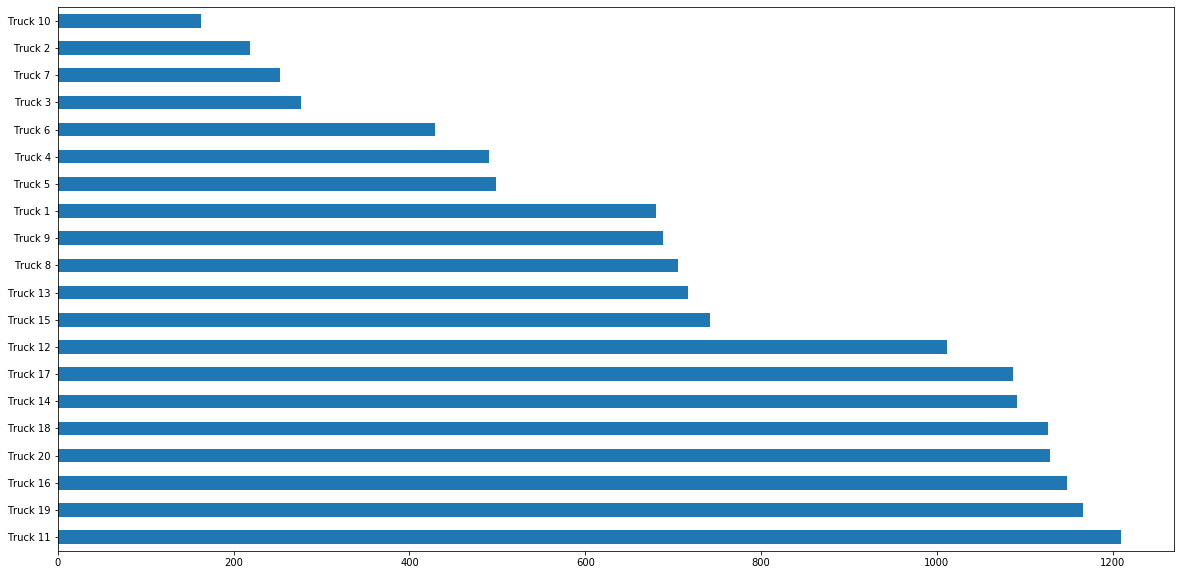

In [15]:
dataset['MACH_SER_NO'].value_counts().plot(kind='barh', figsize=(20,10))

It is evident from the output that Truck 11 has the highest number 1209, followed by truck 19: 1166

Let's now see the distribution of Truck across all the dataset

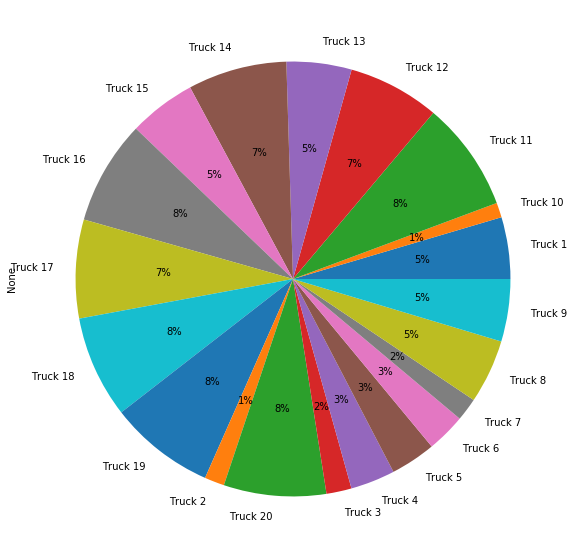

In [16]:
dataset.groupby('MACH_SER_NO').size().plot(kind='pie', autopct='%1.0f%%',figsize=(20, 10))

From the output, you can see that Truck 11, Truck 19, Truck 18, Truck 16, Truck 20 have the highest number(8%).

#### 2.Tons per gallon per distance travelled overall and per truck

In [17]:
MOI = pd.pivot_table(data=dataset, index='MACH_SER_NO', values=['FUEL_USED_IN_CYC','LD_TRAV_DSTNC'], aggfunc='sum')
MOI

,FUEL_USED_IN_CYC,LD_TRAV_DSTNC
MACH_SER_NO,,
Truck 1,100420.824233,2786.1
Truck 10,23418.450211,680.5
Truck 11,129585.529584,5252.6
Truck 12,112298.026987,4474.1
Truck 13,71898.219361,2686.7
Truck 14,120624.040281,4741.7
Truck 15,81992.019975,3200.7
Truck 16,130067.223236,5064.5
Truck 17,117058.182348,4682.9


#### 3. Most efficient/inefficient truck based on above

In [18]:
# Sort by distance travelled 
MOI.sort_values(by='LD_TRAV_DSTNC',ascending=0)

,FUEL_USED_IN_CYC,LD_TRAV_DSTNC
MACH_SER_NO,,
Truck 11,129585.529584,5252.6
Truck 18,126664.611188,5137.9
Truck 16,130067.223236,5064.5
Truck 19,127957.802502,5045.3
Truck 20,126714.294718,5026.6
Truck 14,120624.040281,4741.7
Truck 17,117058.182348,4682.9
Truck 12,112298.026987,4474.1
Truck 15,81992.019975,3200.7


From the output, you can see that Truck 11 has most efficient distance travelled: 5252.6.
Truck 10 has most inefficient distance travelled: 680.5

In [19]:
#Sort by gallon 
MOI.sort_values(by='FUEL_USED_IN_CYC',ascending=0)

,FUEL_USED_IN_CYC,LD_TRAV_DSTNC
MACH_SER_NO,,
Truck 16,130067.223236,5064.5
Truck 11,129585.529584,5252.6
Truck 19,127957.802502,5045.3
Truck 20,126714.294718,5026.6
Truck 18,126664.611188,5137.9
Truck 14,120624.040281,4741.7
Truck 17,117058.182348,4682.9
Truck 12,112298.026987,4474.1
Truck 1,100420.824233,2786.1


From the output, you can see that Truck 16 has most efficient Fuel Used: 130067.223236.
Truck 10 has most inefficient Fuel Used: 23418.450211.

#### 4. Which truck has travelled empty most distance? 

In [20]:
dat= pd.pivot_table(data=dataset, index='MACH_SER_NO', values='EMTY_TRAV_DSTNC', aggfunc='max')
dat

,EMTY_TRAV_DSTNC
MACH_SER_NO,
Truck 1,13.7
Truck 10,8.9
Truck 11,11.3
Truck 12,9.4
Truck 13,9.2
Truck 14,9.4
Truck 15,13.2
Truck 16,10.4
Truck 17,11.6


In [21]:
# Sort by travelled empty most distance
dat.sort_values(by='EMTY_TRAV_DSTNC',ascending=0)

,EMTY_TRAV_DSTNC
MACH_SER_NO,
Truck 4,16.0
Truck 19,14.7
Truck 1,13.7
Truck 6,13.4
Truck 15,13.2
Truck 5,13.1
Truck 17,11.6
Truck 9,11.5
Truck 11,11.3


From the output, you can see that Truck 4 has travelled empty most distance: 16, followed by Truck 19: 14.7

#### 5. What trucks have max/min gear shifts per mile?

In [22]:
Min_G_SHFT_CT = pd.pivot_table(data=dataset, index='MACH_SER_NO', values=['SHFT_CT'], aggfunc='min')
Min_G_SHFT_CT

,SHFT_CT
MACH_SER_NO,
Truck 1,27.0
Truck 10,35.0
Truck 11,31.0
Truck 12,32.0
Truck 13,27.0
Truck 14,31.0
Truck 15,30.0
Truck 16,31.0
Truck 17,27.0


In [23]:
Min_G_SHFT_CT.sort_values(by='SHFT_CT',ascending=1)

,SHFT_CT
MACH_SER_NO,
Truck 9,2.0
Truck 8,8.0
Truck 3,16.0
Truck 5,24.0
Truck 19,26.0
Truck 7,27.0
Truck 4,27.0
Truck 20,27.0
Truck 1,27.0


In [24]:
Max_G_SHFT_CT = pd.pivot_table(data=dataset, index='MACH_SER_NO', values=['SHFT_CT'], aggfunc='max')
Max_G_SHFT_CT

,SHFT_CT
MACH_SER_NO,
Truck 1,212.0
Truck 10,180.0
Truck 11,165.0
Truck 12,181.0
Truck 13,164.0
Truck 14,175.0
Truck 15,205.0
Truck 16,219.0
Truck 17,183.0


In [25]:
Max_G_SHFT_CT.sort_values(by='SHFT_CT',ascending=0)

,SHFT_CT
MACH_SER_NO,
Truck 7,244.0
Truck 5,238.0
Truck 9,233.0
Truck 8,231.0
Truck 4,231.0
Truck 6,224.0
Truck 16,219.0
Truck 1,212.0
Truck 2,209.0


It is evident From the output, you can see that Truck 7 with 244 has max gear shifts per mile and Truck 9 with 2 has min gear shifts per mile

#### 6. Which truck has max stop time in empty?

In [26]:
Max_EMTY_STOP_TM = pd.pivot_table(data=dataset, index='MACH_SER_NO', values=['EMTY_STOP_TM'], aggfunc='max')
Max_EMTY_STOP_TM

,EMTY_STOP_TM
MACH_SER_NO,
Truck 1,6515.0
Truck 10,3734.0
Truck 11,2910.0
Truck 12,6967.0
Truck 13,6542.0
Truck 14,5427.0
Truck 15,3774.0
Truck 16,12149.0
Truck 17,6877.0


In [27]:
Max_EMTY_STOP_TM.sort_values(by='EMTY_STOP_TM',ascending=0)

,EMTY_STOP_TM
MACH_SER_NO,
Truck 16,12149.0
Truck 12,6967.0
Truck 17,6877.0
Truck 20,6582.0
Truck 5,6556.0
Truck 13,6542.0
Truck 1,6515.0
Truck 4,6277.0
Truck 18,6090.0


Truck 16 has max stop time in empty with 12149.0

#### 7. Which truck has most distance travelled in empty?

In [28]:
Max_EMTY_TRAV_DSTNC = pd.pivot_table(data=dataset, index='MACH_SER_NO', values=['EMTY_TRAV_DSTNC'], aggfunc='max').reset_index().rename(columns={'EMTY_TRAV_DSTNC': 'Max EMTY_TRAV_DSTNC'})
Max_EMTY_TRAV_DSTNC

,MACH_SER_NO,Max EMTY_TRAV_DSTNC
0,Truck 1,13.7
1,Truck 10,8.9
2,Truck 11,11.3
3,Truck 12,9.4
4,Truck 13,9.2
5,Truck 14,9.4
6,Truck 15,13.2
7,Truck 16,10.4
8,Truck 17,11.6
9,Truck 18,9.9


In [29]:
Max_EMTY_TRAV_DSTNC.sort_values(by='Max EMTY_TRAV_DSTNC',ascending=0)

,MACH_SER_NO,Max EMTY_TRAV_DSTNC
14,Truck 4,16.0
10,Truck 19,14.7
0,Truck 1,13.7
16,Truck 6,13.4
6,Truck 15,13.2
15,Truck 5,13.1
8,Truck 17,11.6
19,Truck 9,11.5
2,Truck 11,11.3
18,Truck 8,11.3


Truck 4 has travelled empty most distance: 16

#### 8. What is the relationship between fuel used/distance and pay load weight?

In [30]:
# Create dataframe forrelationship between fuel used/distance and pay load weight
data = pd.DataFrame(dataset, columns = ["FUEL_USED_IN_CYC","PAYLD_WT","MACH_SER_NO"]) 
data

,FUEL_USED_IN_CYC,PAYLD_WT,MACH_SER_NO
0,77.600942,349.7,Truck 1
1,177.914355,336.5,Truck 1
2,138.167531,356.3,Truck 1
3,140.060237,343.1,Truck 1
4,219.080709,379.3,Truck 1
...,...,...,...
177637,NaN,NaN,NaN
177638,NaN,NaN,NaN
177639,NaN,NaN,NaN
177640,NaN,NaN,NaN


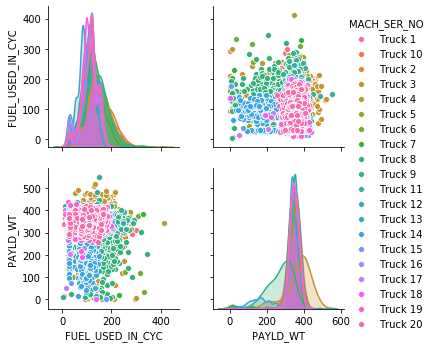

<Figure size 3312x1872 with 0 Axes>

In [31]:
sns.pairplot(data,hue = 'MACH_SER_NO',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.figure(figsize=(46, 26))
plt.show()

C:\Users\Soumana\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Soumana\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


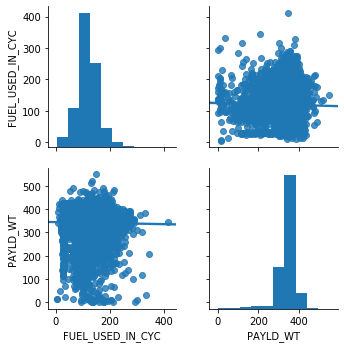

In [34]:
sns.pairplot(data , kind="reg")
plt.show()

Weak or no correlation (the blue line): The plot shows no obvious trend between fuel used anddistance. This is a form of weak correlation, which occurs when an association between two features is not obvious or is hardly observable.

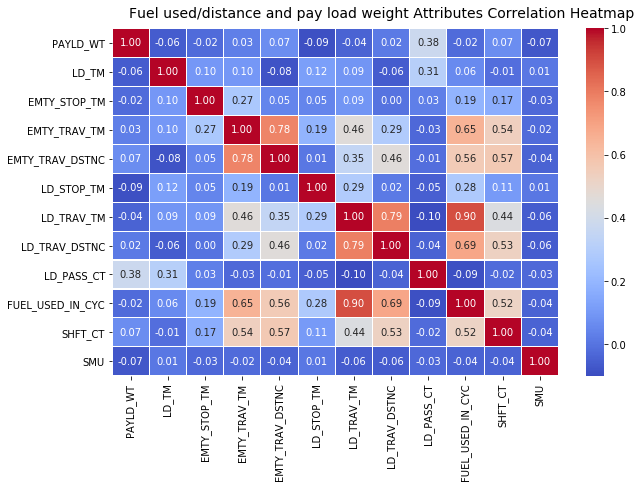

In [143]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Fuel used/distance and pay load weight Attributes Correlation Heatmap', fontsize=14)

A correlation matrix provides a bit more evidence to the previous graphical analysis. We see that fuel used/distance and pay load weight are not correlated with -0.02 and 0.02.